# Quest 2 : Shark Attacks


### Dream Team:

- <em>Karina</em>
- <em>Pollyana</em>
- <em>Salim</em>
- <em>Jules</em>

# Introduction

As an insurance company we want to analyze shark attack statistics in order to evaluate and assess the incidence rates based on various features and factors

This analysis can help determine premium rates based on the likelihood of shark-related incidents.



Business goal



Develop a fair method to determine insurance rates for shark attack coverage using data from shark attack incidents

Hypothesis

The easiest way to get attacked by a shark is by certain type of activity

Shark attacks occur more frequently in certain countries

The severity of injuries during a shark attack is positively correlated with higher insurance rates

## <font color='DarkBlue'>I. <ins>Prerequisites</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins>Identifying the dataset source</ins>: <font color='violet'></font>

<ins><strong>Data Source: </strong></ins>

In [1]:
sharks = "GSAF5.xls"

In [2]:
source = sharks

### <font color='MediumBlue'>2 - <ins> Importing libraries</ins>: <font color='violet'></font>

<strong>pandas</strong>

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

### <font color='MediumBlue'>3 - <ins>  Loading the dataset into a DataFrame</ins>: <font color='violet'></font>

In [4]:
df = pd.read_excel(source)

##  <font color='DarkBlue'>II. <ins>Exploring the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Dataset Overview</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Displaying number of rows and number of columns: </font>

In [5]:
df.shape

(6947, 23)

#### <font color='CornflowerBlue'>b) Glancing at the dataset: </font>

<ins><strong>Displaying the first rows : </strong></ins>

In [6]:
df.head(2)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,08 Dec-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,1770,Swimming,malle,20s,NaN,...,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,...,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Importing a module for missing values visualization
import missingno as msno

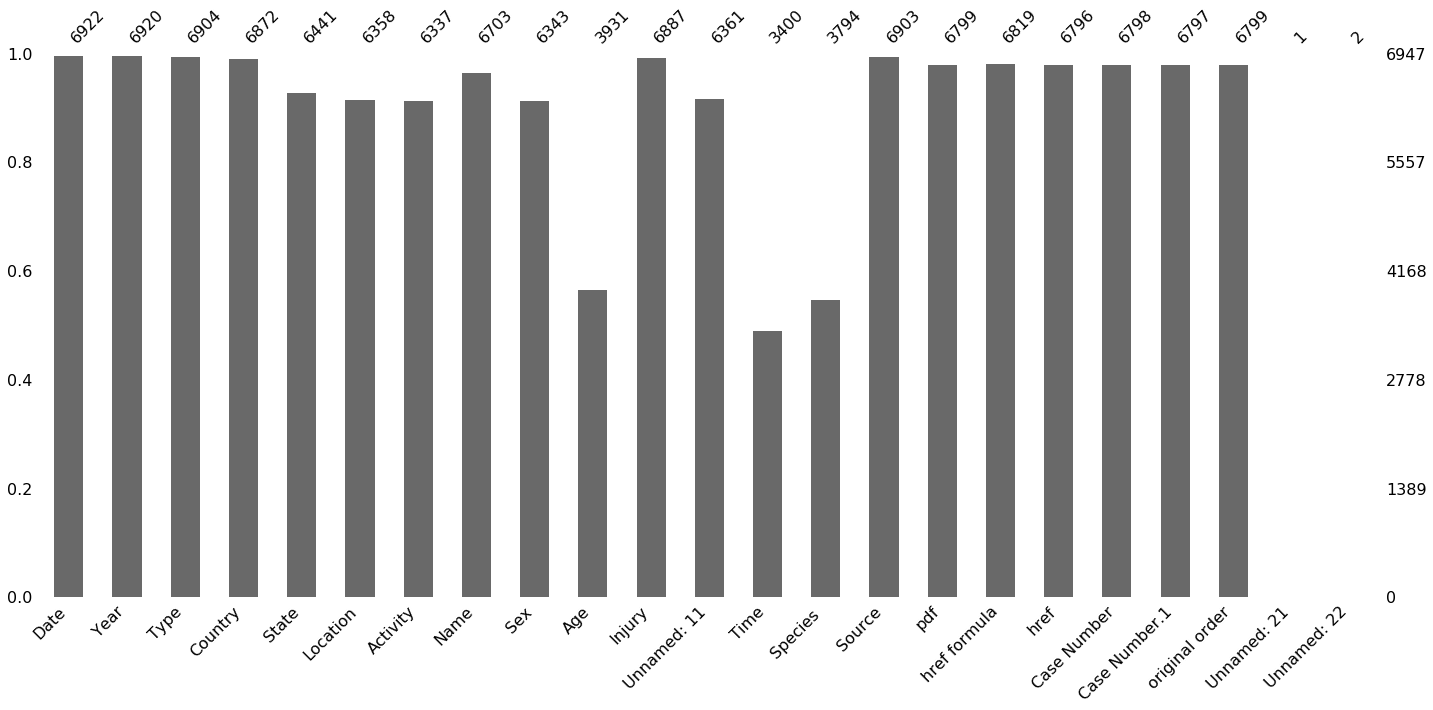

In [8]:
# Visualize the number of missing. values as a bar chart
msno.bar(df) 

In [9]:
# pourcentage of missing values for each column
df.isna().sum()/df.shape[0]*100

Date               0.359868
Year               0.388657
Type               0.618972
Country            1.079603
State              7.283720
Location           8.478480
Activity           8.780769
Name               3.512307
Sex                8.694400
Age               43.414423
Injury             0.863682
Unnamed: 11        8.435296
Time              51.058011
Species           45.386498
Source             0.633367
pdf                2.130416
href formula       1.842522
href               2.173600
Case Number        2.144811
Case Number.1      2.159205
original order     2.130416
Unnamed: 21       99.985605
Unnamed: 22       99.971211
dtype: float64

In [10]:
# Number of missing values for each column
df.isna().sum()

Date                25
Year                27
Type                43
Country             75
State              506
Location           589
Activity           610
Name               244
Sex                604
Age               3016
Injury              60
Unnamed: 11        586
Time              3547
Species           3153
Source              44
pdf                148
href formula       128
href               151
Case Number        149
Case Number.1      150
original order     148
Unnamed: 21       6946
Unnamed: 22       6945
dtype: int64

<ins><strong>Displaying names and culumns type : </strong></ins>

In [11]:
df.dtypes

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Unnamed: 11        object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [12]:
df.nunique()

Date              5983
Year               258
Type                11
Country            224
State              896
Location          4495
Activity          1585
Name              5669
Sex                  9
Age                243
Injury            4071
Unnamed: 11         12
Time               409
Species           1671
Source            5284
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [13]:
df.nunique()[lambda x: x <= 10]

Sex            9
Unnamed: 21    1
Unnamed: 22    2
dtype: int64

#### <font color='CornflowerBlue'>c) Displaying unique values for each column that has less than 10 distinct value:</font>

In [14]:
dico = {}
for i in range(len(df.columns)):
    if df.nunique()[i] <= 10:
        dico[df.columns[i]] = df.nunique()[i]
        
for j in dico.keys():
    print(j,":",df[j].unique())

Sex : ['20s' 'F' 'M' nan ' M' 'M ' 'lli' 'M x 2' 'N' '.']
Unnamed: 21 : [nan 'stopped here']
Unnamed: 22 : [nan 'Teramo' 'change filename']


### <font color='MediumBlue'>2 - <ins> Identifying numerical variables and their specifications</ins>: <font color='violet'></font>

<ins><strong><font color='BlueViolet'>Numerical</font></strong> **variables specifications**:</ins>

From the data types output it is safe to assume that the following columns are numerical variables: 
- **Year**: <em><font color='DarkMagenta'> float64</font></em>
- **original order**: <em><font color='DarkMagenta'> float64</font></em>

However, all remaining columns shouldn't be necessary considered as categorical variables.
Indeed, based on the name of the following columns and their values, these are numerical variables in nature:

- **Age**:<font color='red'> should be</font> <em><font color='DarkMagenta'>int</font></em>
- **Date**:<font color='red'> should be</font><em><font color='DarkMagenta'> Date</font></em>
- **Time**:<font color='red'> should be</font><em><font color='DarkMagenta'> Date</font></em>



Additionally, here are the following actions that can be suggested to "fix" some of the data discrepancies:
- Modify "Date" type and format
- Change "Year" type to int
- Deal with missing values such as "Sex"
- Address outliers (?)

In [15]:
#renaming variables: everything in lower case and replacing spaces levaring fix_col_names function

def fix_col_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+','_',regex=True)
    return df

fix_col_names(df)
#
# example df.rename(columns= {'foo': 'bar'}, inplace=True)



,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,href_formula,href,case_number,case_number.1,original_order,unnamed:_21,unnamed:_22
0,08 Dec-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,1770,Swimming,malle,20s,NaN,...,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,...,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Dec-2023,2023.0,Unprovoked,MEXICO,Jalisco,San Patricio Melaque,Swimming,Maria Fernandez Martinez Jimenez,F,26,...,NaN,"News Channel 21, 12/3.2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,Clack Island,Swimming,Matthew Davitt,M,21,...,1.8m bull shark,"ABC Net, 11/30/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21 Nov-2023,2023.0,Unprovoked,BAHAMAS,Grand Bahama Island,Tiger Beach,Scuba diving,female,F,47,...,NaN,"Eye Witness News, 11/22/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Cleaning "Sex" column
df_cleaned = df

df_cleaned["sex"].unique()

array(['20s', 'F', 'M', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'],
      dtype=object)

In [17]:

df_cleaned["sex"] = df_cleaned["sex"].str.replace(" ", "")

df_cleaned["sex"] = df_cleaned["sex"].str.replace("Mx2", "M").replace("male", "M").replace("males", "M")
df_cleaned["sex"] = df_cleaned["sex"].apply(lambda x: x if (x =='F' or  x =='M' or x == "boat") else "unknown")
#df_cleaned["sex"] = df_cleaned["sex"].str.replace(" ", "")

In [18]:
df_cleaned["sex"].value_counts()

M          5565
F           773
unknown     609
Name: sex, dtype: int64

In [19]:
#df_cleaned.head(3)

del df_cleaned["unnamed:_21"] # deleting empty col
del df_cleaned["unnamed:_22"] # deleting empty col

In [20]:
df_cleaned.drop_duplicates(inplace=True) # deleting duplicates
df_cleaned.head()

,date,year,type,country,state,location,activity,name,sex,age,...,unnamed:_11,time,species,source,pdf,href_formula,href,case_number,case_number.1,original_order
0,08 Dec-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,1770,Swimming,malle,unknown,NaN,...,N,16h32,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
1,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,...,Y,11h00,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN
2,02 Dec-2023,2023.0,Unprovoked,MEXICO,Jalisco,San Patricio Melaque,Swimming,Maria Fernandez Martinez Jimenez,F,26,...,Y,Morning,NaN,"News Channel 21, 12/3.2023",NaN,NaN,NaN,NaN,NaN,NaN
3,30 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,Clack Island,Swimming,Matthew Davitt,M,21,...,N,11h30,1.8m bull shark,"ABC Net, 11/30/2023",NaN,NaN,NaN,NaN,NaN,NaN
4,21 Nov-2023,2023.0,Unprovoked,BAHAMAS,Grand Bahama Island,Tiger Beach,Scuba diving,female,F,47,...,Y,10h30,NaN,"Eye Witness News, 11/22/2023",NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Cleaning "activity" column
df_cleaned["activity"].value_counts()[lambda x: x <= 20]
df_cleaned["activity"].value_counts()

Surfing                                                                                    1116
Swimming                                                                                    970
Fishing                                                                                     485
Spearfishing                                                                                380
Wading                                                                                      173
                                                                                           ... 
Swimming outside fishing net                                                                  1
Attempting to net shark in shark channel                                                      1
Swimming to shore from capsized sailboat                                                      1
Free diving & spearfishing                                                                    1
Accidentally dragged overboard from the 

In [22]:
import re
# Cleaning "Activities" column

def strip_strings(value):
    if isinstance(value, str):
        return value.strip()
    else:
        return value

df_cleaned["activity"] = df_cleaned["activity"].apply(strip_strings)
df_cleaned["activity"]=df_cleaned["activity"].replace("-", " ")
df_cleaned["activity"]=df_cleaned["activity"].str.lower().replace(r".*swimming.*","swimming", regex=True)
df_cleaned["activity"]= df_cleaned["activity"].replace(r".*fishing.*","fishing", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*surfboard.*","surfing", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r"floating","swimming", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*stand-up paddle.*","stand-up paddle", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*bathing.*","bathing", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*surfing.*","surfing", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*surf-skiing.*","kayaking", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*surf skiing.*","kayaking", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*kayaking.*","kayaking", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*shark feeding.*","shark feeding", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*feeding sharks.*","shark feeding", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*kayak.*","kayaking", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*canoe.*","canoeing", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*stand up paddle.*","stand up paddle", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*paddle boarding.*","stand up paddle", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*SUP.*","stand up paddle", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*surf-sking.*","kayaking", regex=True)
df_cleaned["activity"]=df_cleaned["activity"].replace(r".*diving.*","diving", regex=True)

df_cleaned["activity"].value_counts()
df_cleaned["activity"].nunique()

799

In [23]:
df_cleaned["type"].replace(["Unverified", "?", "Under investigation", "Invalid", "Questionable"], "Unconfirmed", inplace=True)
df_cleaned["type"].value_counts()

Unprovoked      5091
Provoked         633
Unconfirmed      576
Watercraft       355
Sea Disaster     242
Boat               7
Name: type, dtype: int64

In [24]:
# Changing Age type

# df['age'] = df['age'].apply(float)

#### <font color='CornflowerBlue'>a) Continuous variables: </font>

In [25]:
cont_var = ['age', 'year'] #Age object -> int, Year  float64 -> int


#### <font color='CornflowerBlue'>b) Discrete variables: </font>

In [26]:
disc_var = ['date','time', 'original_order']     # None for this dataset, Time   object -> datetime, Date:  object 

#### <font color='CornflowerBlue'>c) All numerical variables: </font>

In [27]:
num_var = disc_var + cont_var

### <font color='MediumBlue'>3 - <ins> Identifying categorical variables and their specifications</ins>: <font color='violet'></font>

<strong><font color='BlueViolet'>Categorical</font></strong> **variables specification**:

- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.There is no obvious order for that variable.
- **xx**:<ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.There is no obvious order for that variable.
- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>. This is a boolean like variable with no particular order. 
- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.This is a boolean like variable with no particular order.
- **xxx**: <ins><em><font color='DarkMagenta'>Ordinal</font></em></ins>.Clearly, we can order the level of education, for example by ascending order.



####  <font color='CornflowerBlue'>a) Nominal variables: </font>

In [28]:
nom_var = ['type','country','state','location','activity','name','sex','injury','species','source']

#### <font color='CornflowerBlue'>b) Ordinal variables:</font>

In [29]:
ord_var = []

####  <font color='CornflowerBlue'>c) All categorical variables:</font>

In [30]:
cat_var = nom_var + ord_var

## <font color='DarkBlue'>III. <ins>Analysing Descriptive Statistics</ins>: <font color='blue'></font>

In [31]:
# Number of missing values for each column
df.isna().sum()


date                 1
year                 3
type                19
country             51
state              482
location           565
activity           586
name               220
sex                  0
age               2992
injury              36
unnamed:_11        562
time              3523
species           3129
source              20
pdf                124
href_formula       128
href               127
case_number        125
case_number.1      126
original_order     124
dtype: int64

In [32]:
# pourcentage of missing values for each column
df.isna().sum()/df.shape[0]*100

date               0.014445
year               0.043334
type               0.274447
country            0.736675
state              6.962300
location           8.161202
activity           8.464538
name               3.177813
sex                0.000000
age               43.218258
injury             0.520006
unnamed:_11        8.117868
time              50.888343
species           45.197169
source             0.288892
pdf                1.791131
href_formula       1.848909
href               1.834465
case_number        1.805576
case_number.1      1.820020
original_order     1.791131
dtype: float64

### <font color='MediumBlue'>1 - <ins> Analysing numerical variables</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Measuring Central Tendencies: <font color='violet'></font> 

#### i) <font color='ForestGreen'>Mean</font>

In [33]:
df[num_var].mean().round(2)

original_order    3401.15
year              1934.12
dtype: float64

#### ii)  <font color='ForestGreen'>Median</font>

In [34]:
df[num_var].median()

original_order    3401.0
year              1985.0
dtype: float64

#### iii)  <font color='ForestGreen'>Mode</font>

In [35]:
df[num_var].mode()

,date,time,original_order,age,year
0,1957,Afternoon,569.0,16,2015.0
1,NaN,NaN,6369.0,19,NaN


**Findings on central tendencies**

Based on our calculations and interpretations of central measures, we can make the following observations:

 

#### <font color='CornflowerBlue'>b) Measuring Dispersion:</font> 

#### i) <font color='ForestGreen'>Standard Deviation</font>

In [36]:
df[num_var].std().round(2)

original_order    1963.08
year               273.31
dtype: float64

* **xxxx**: The Standard Deviation blablabla



#### ii) <font color='ForestGreen'>Range</font>

In [37]:
df[num_var].max() - df[num_var].min()

original_order    6800.0
year              2023.0
dtype: float64

#### <font color='CornflowerBlue'>c)  Summarizing Statistics:</font> 

#### <font color='ForestGreen'> i) Statistics Summary: count, mean, standard deviation, min, quartiles, maximum</font>

In [38]:
df[num_var].describe().round(2)

,original_order,year
count,6799.00,6920.00
mean,3401.15,1934.12
std,1963.08,273.31
min,2.00,0.00
25%,1701.50,1947.00
50%,3401.00,1985.00
75%,5100.50,2009.00
max,6802.00,2023.00


### <font color='MediumBlue'>2 - <ins> Analysing categorical variables</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Measuring Frequency: </font>

#### <font color='ForestGreen'> i) frequency in counts</font>

In [39]:
for k in cat_var:
    print(f"{df[k].value_counts()} \n")    

Unprovoked      5091
Provoked         633
Unconfirmed      576
Watercraft       355
Sea Disaster     242
Boat               7
Name: type, dtype: int64 

USA                           2535
AUSTRALIA                     1474
SOUTH AFRICA                   596
NEW ZEALAND                    143
PAPUA NEW GUINEA               136
                              ... 
GUATEMALA                        1
British Overseas Territory       1
TUVALU                           1
BRITISH ISLES                    1
ROATAN                           1
Name: country, Length: 224, dtype: int64 

Florida                           1178
New South Wales                    520
Queensland                         346
Hawaii                             338
California                         323
                                  ... 
300 miles east of Luzon              1
180 miles southeast of Okinawa       1
Salerno                              1
Norfolk                              1
Island of Kos                

#### <font color='ForestGreen'> ii) frequency in percentages</font>

In [40]:
for k in cat_var:
    percentage = (df[k].value_counts() / df.shape[0]) * 100
    print(f"{percentage} \n ")

Unprovoked      73.537484
Provoked         9.143435
Unconfirmed      8.320092
Watercraft       5.127835
Sea Disaster     3.495594
Boat             0.101112
Name: type, dtype: float64 
 
USA                           36.617074
AUSTRALIA                     21.291348
SOUTH AFRICA                   8.608985
NEW ZEALAND                    2.065579
PAPUA NEW GUINEA               1.964466
                                ...    
GUATEMALA                      0.014445
British Overseas Territory     0.014445
TUVALU                         0.014445
BRITISH ISLES                  0.014445
ROATAN                         0.014445
Name: country, Length: 224, dtype: float64 
 
Florida                           17.015745
New South Wales                    7.511195
Queensland                         4.997833
Hawaii                             4.882276
California                         4.665607
                                    ...    
300 miles east of Luzon            0.014445
180 miles southeast 

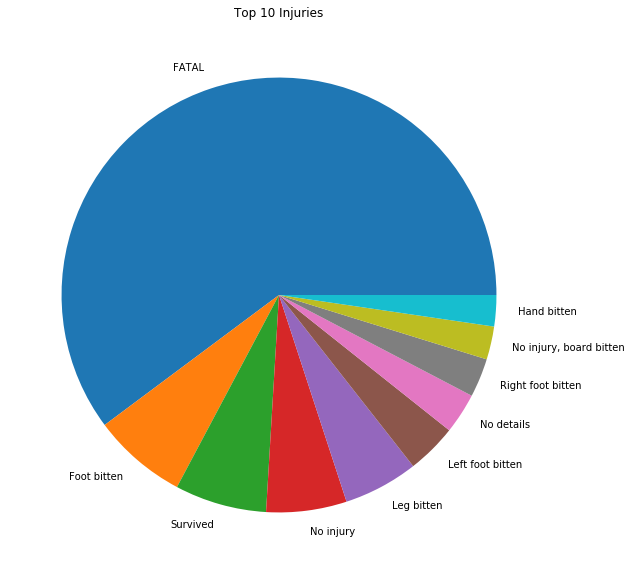

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.pie(df.injury.value_counts().head(10), labels = df.injury.value_counts().head(10).index)
plt.title('Top 10 Injuries')
plt.show()

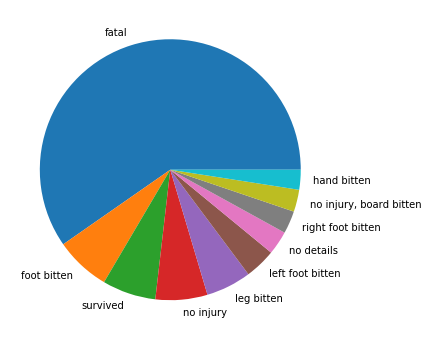

In [42]:
import matplotlib.pyplot as plt
df['injury'] = df['injury'].str.lower().str.strip()
all_injuries = df['injury'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(df.injury.value_counts().head(10), labels = df.injury.value_counts().head(10).index)
# plt.title('Top 10 Injuries')
plt.show()

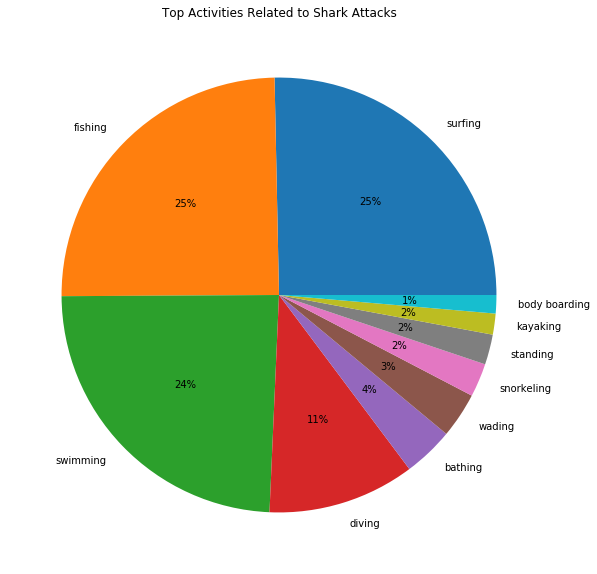

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.pie(df_cleaned.activity.value_counts().head(10), labels = df_cleaned.activity.value_counts().head(10).index, autopct='%1.0f%%')
plt.title('Top Activities Related to Shark Attacks')
plt.show()

In [44]:
#Top 2 County with most attacks:
##########################
k = 0
l = 0
for i in list(df.location):
    if "Volusia County" in str(i):
        k += 1
    elif "Brevard County" in str(i):
        l += 1
print(f"Volusia Country: {k} \nBrevard County: {l}")

Volusia Country: 352 
Brevard County: 100


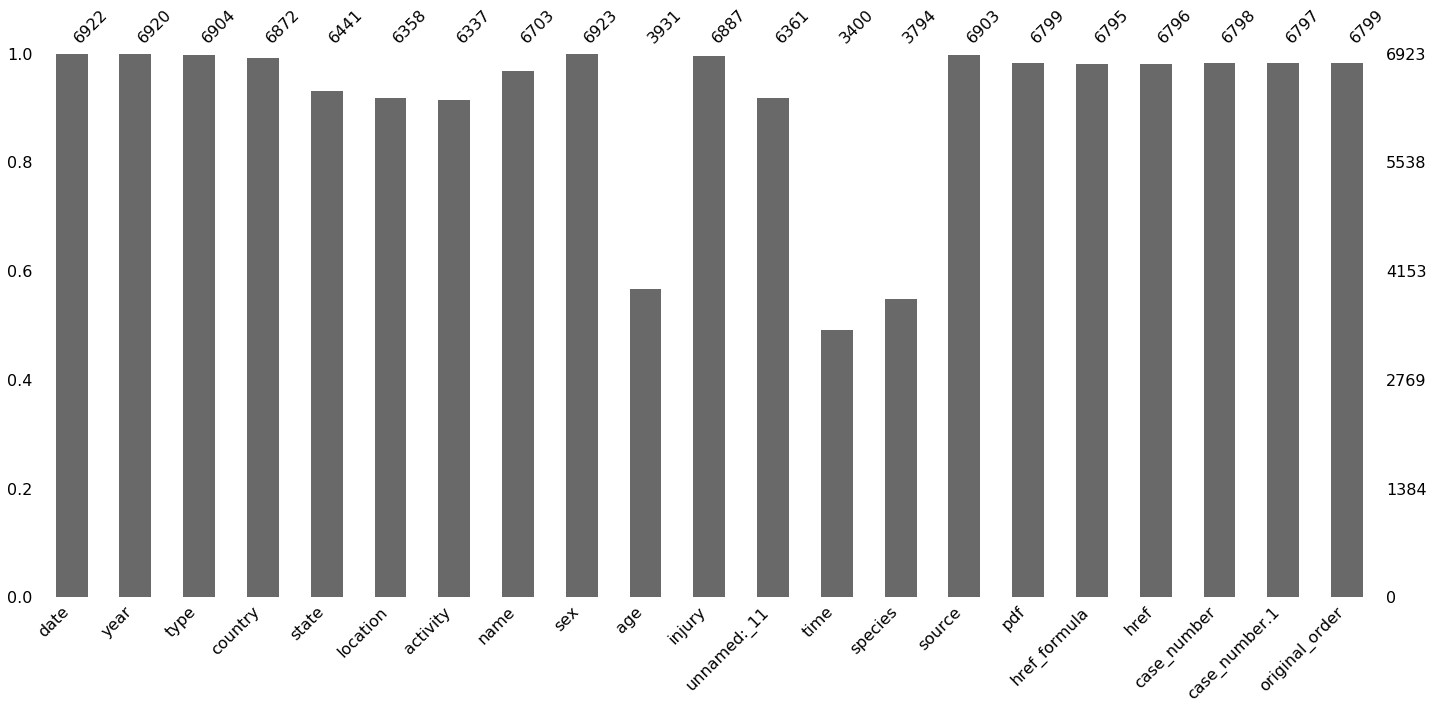

In [45]:
# Visualize the number of missing. values as a bar chart
msno.bar(df_cleaned) 

In [46]:
df_cleaned.nunique()

date              5983
year               258
type                 6
country            224
state              896
location          4495
activity           799
name              5669
sex                  3
age                243
injury            3981
unnamed:_11         12
time               409
species           1671
source            5284
pdf               6789
href_formula      6785
href              6776
case_number       6777
case_number.1     6775
original_order    6797
dtype: int64

In [48]:
df_cleaned.shape

(6923, 21)

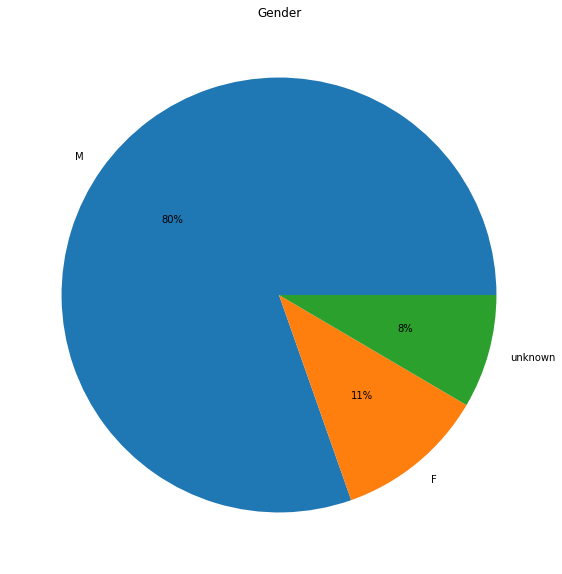

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.pie(df_cleaned.sex.value_counts().head(10), labels = df_cleaned.sex.value_counts().head(10).index, autopct='%1.0f%%')
plt.title('Gender')
plt.show()